#📌 Extracción

In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
datos = pd.read_json(url)
datos.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [42]:
normalizacion_customer = pd.json_normalize(datos['customer'])
normalizacion_phone = pd.json_normalize(datos['phone'])
normalizacion_internet = pd.json_normalize(datos['internet'])
normalizacion_account = pd.json_normalize(datos['account'])

In [43]:
datos_normalizados = pd.concat([
    normalizacion_customer.add_prefix('customer_'),
    normalizacion_phone.add_prefix('phone_'),
    normalizacion_internet.add_prefix('internet_'),
    normalizacion_account.add_prefix('account_')
], axis=1)

datos_normalizados.tail()

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [44]:
datos_normalizados.shape
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7267 non-null   object 
 1   customer_SeniorCitizen     7267 non-null   int64  
 2   customer_Partner           7267 non-null   object 
 3   customer_Dependents        7267 non-null   object 
 4   customer_tenure            7267 non-null   int64  
 5   phone_PhoneService         7267 non-null   object 
 6   phone_MultipleLines        7267 non-null   object 
 7   internet_InternetService   7267 non-null   object 
 8   internet_OnlineSecurity    7267 non-null   object 
 9   internet_OnlineBackup      7267 non-null   object 
 10  internet_DeviceProtection  7267 non-null   object 
 11  internet_TechSupport       7267 non-null   object 
 12  internet_StreamingTV       7267 non-null   object 
 13  internet_StreamingMovies   7267 non-null   objec

In [45]:
datos_normalizados.columns = datos_normalizados.columns.str.replace(r'^(customer_|phone_|internet_|account_)', '', regex=True)
datos_normalizados.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [46]:
datos_normalizados['customerID'] = datos['customerID']
datos_normalizados['Churn'] = datos['Churn']
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [47]:
datos_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [48]:
nulos = datos_normalizados.isnull().sum()
nulos

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [49]:
duplicados = datos_normalizados.duplicated().sum()
duplicados

np.int64(0)

In [50]:
datos_normalizados['customerID'].nunique()

7267

In [51]:
datos_normalizados['Charges.Total'].dtype

dtype('O')

In [52]:
datos_normalizados['Churn'].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [53]:
datos_normalizados['Charges.Total'] = pd.to_numeric(datos_normalizados['Charges.Total'], errors='coerce')
datos_normalizados['Charges.Total'].dtype

dtype('float64')

In [54]:
datos_normalizados['Churn'].value_counts(dropna=False)
datos_normalizados = datos_normalizados[datos_normalizados['Churn'].isin(['Yes', 'No'])]

Cuentas Diarias

In [55]:
datos_normalizados['Cuentas_Diarias'] = datos_normalizados['Charges.Monthly'] / 30

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
datos_normalizados.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn,Cuentas_Diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0002-ORFBO,No,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0003-MKNFE,No,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ,Yes,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF,Yes,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0013-EXCHZ,Yes,2.796667


In [57]:
columnas_renombrar = {
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Antiguedad_Meses',
    'Contract': 'Tipo_Contrato',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total'
}
datos_normalizados = datos_normalizados.rename(columns=columnas_renombrar)


#📊 Carga y análisis

In [58]:
datos_normalizados.describe()

,Adulto_Mayor,Antiguedad_Meses,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [59]:
print("\n🔢 ANÁLISIS DE VARIABLES:")

print("\n• ANTIGÜEDAD (Antiguedad_Meses):")
print(f"Promedio: {datos_normalizados['Antiguedad_Meses'].mean():.1f} meses")
print(f"Mediana: {datos_normalizados['Antiguedad_Meses'].median():.1f} meses")
print(f"Desviación estándar: {datos_normalizados['Antiguedad_Meses'].std():.1f} meses")
print(f"Rango: {datos_normalizados['Antiguedad_Meses'].min()}-{datos_normalizados['Antiguedad_Meses'].max()} meses")

print("\n• CARGO MENSUAL (Cargo_Mensual):")
print(f"Promedio: ${datos_normalizados['Cargo_Mensual'].mean():.2f}")
print(f"Mediana: ${datos_normalizados['Cargo_Mensual'].median():.2f}")
print(f"Desviación estándar: ${datos_normalizados['Cargo_Mensual'].std():.2f}")
print(f"Rango: ${datos_normalizados['Cargo_Mensual'].min():.2f}-${datos_normalizados['Cargo_Mensual'].max():.2f}")

print("\n• CARGO TOTAL (Cargo_Total):")
print(f"Promedio: ${datos_normalizados['Cargo_Total'].mean():.2f}")
print(f"Mediana: ${datos_normalizados['Cargo_Total'].median():.2f}")
print(f"Desviación estándar: ${datos_normalizados['Cargo_Total'].std():.2f}")

print("\n• CUENTAS DIARIAS:")
print(f"Promedio: ${datos_normalizados['Cuentas_Diarias'].mean():.2f} por día")
print(f"Mediana: ${datos_normalizados['Cuentas_Diarias'].median():.2f} por día")


🔢 ANÁLISIS DE VARIABLES:

• ANTIGÜEDAD (Antiguedad_Meses):
Promedio: 32.4 meses
Mediana: 29.0 meses
Desviación estándar: 24.6 meses
Rango: 0-72 meses

• CARGO MENSUAL (Cargo_Mensual):
Promedio: $64.76
Mediana: $70.35
Desviación estándar: $30.09
Rango: $18.25-$118.75

• CARGO TOTAL (Cargo_Total):
Promedio: $2283.30
Mediana: $1397.47
Desviación estándar: $2266.77

• CUENTAS DIARIAS:
Promedio: $2.16 por día
Mediana: $2.34 por día


In [60]:
churn_counts = datos_normalizados['Churn'].value_counts()
churn_pct = datos_normalizados['Churn'].value_counts(normalize=True) * 100

print(f"\nSe quedaron: {churn_counts['No']:,} clientes ({churn_pct['No']:.1f}%)")
print(f"Se fueron: {churn_counts['Yes']:,} clientes ({churn_pct['Yes']:.1f}%)")
print(f"Total clientes: {len(datos_normalizados):,}")



Se quedaron: 5,174 clientes (73.5%)
Se fueron: 1,869 clientes (26.5%)
Total clientes: 7,043


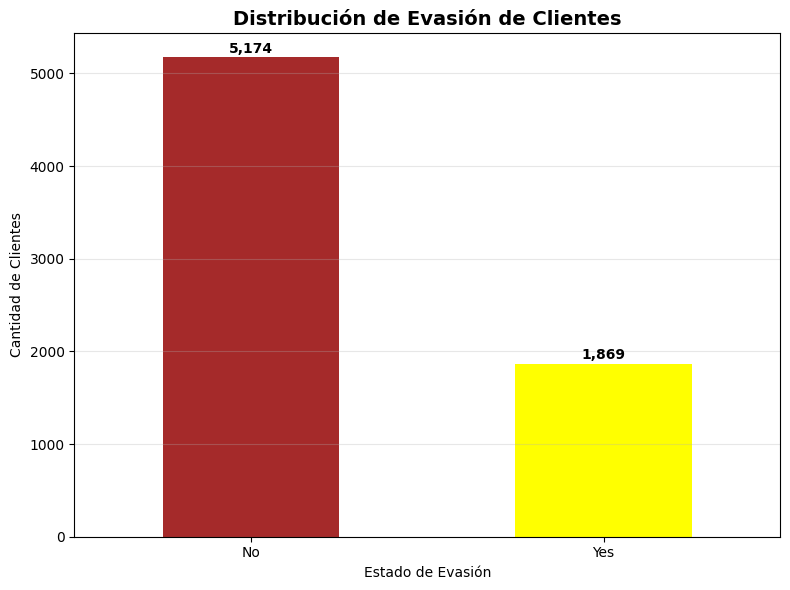

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['brown', 'yellow'])
plt.title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Estado de Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)


for i, v in enumerate(churn_counts.values):
   plt.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

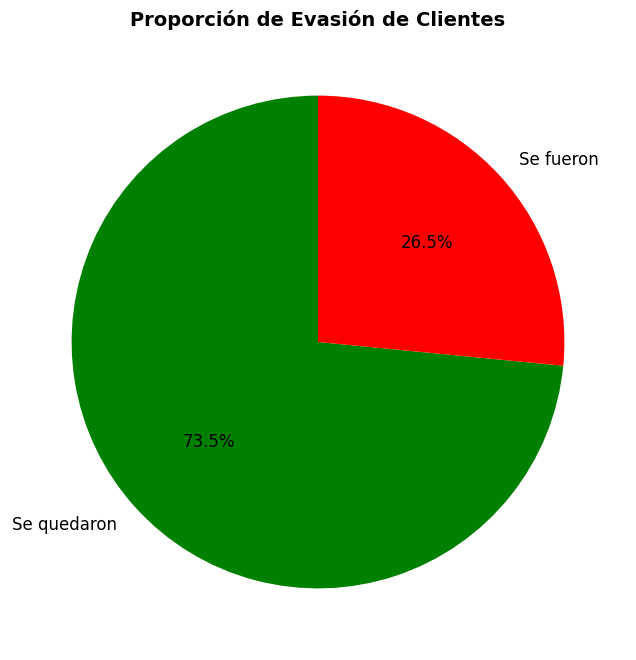

In [62]:
plt.figure(figsize=(8, 8))
plt.pie(churn_counts.values, labels=['Se quedaron', 'Se fueron'],
       autopct='%1.1f%%', colors=['green', 'red'],
       startangle=90, textprops={'fontsize': 12})
plt.title('Proporción de Evasión de Clientes', fontsize=14, fontweight='bold')
plt.show()


Churn     No  Yes
Genero           
Female  2549  939
Male    2625  930


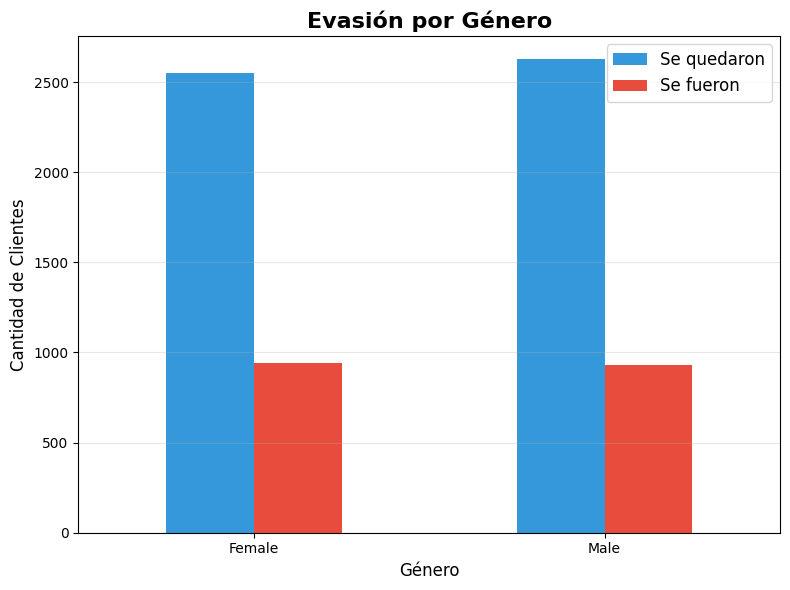

In [63]:
churn_genero = pd.crosstab(datos_normalizados['Genero'], datos_normalizados['Churn'])
print(churn_genero)

churn_genero.plot(kind='bar', color=['#3498db', '#e74c3c'], figsize=(8, 6))
plt.title('Evasión por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Churn             No   Yes
Tipo_Contrato             
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


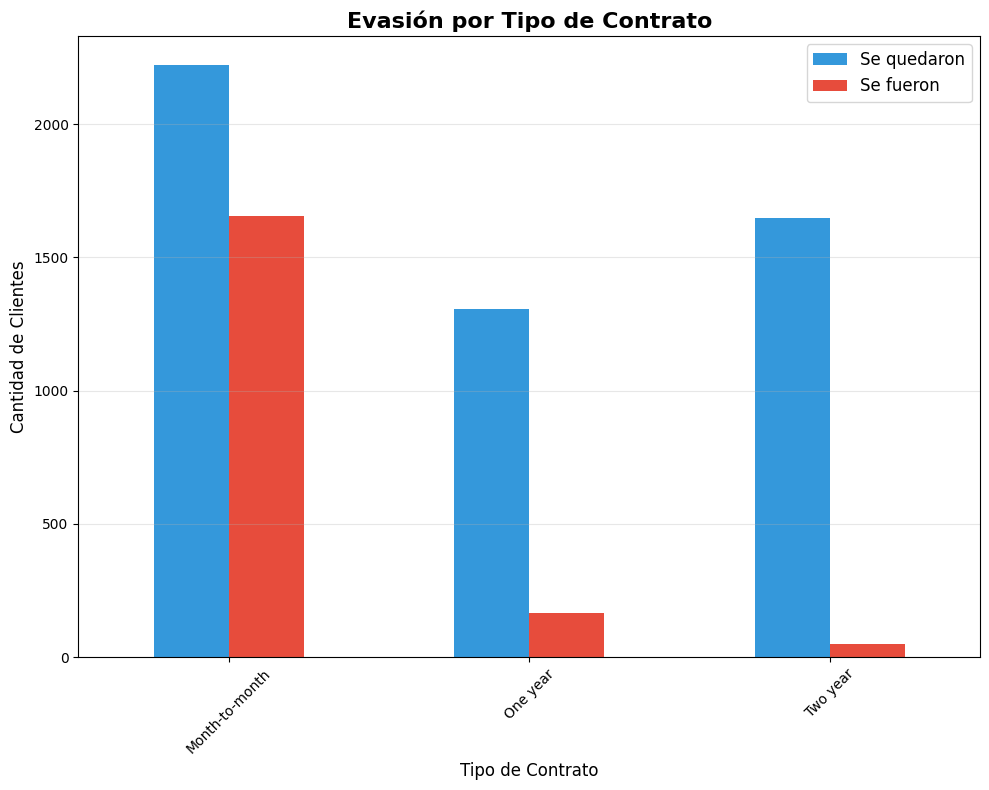

In [64]:
churn_contrato = pd.crosstab(datos_normalizados['Tipo_Contrato'], datos_normalizados['Churn'], normalize='index') * 100
print(churn_contrato.round(1))

churn_contrato_counts = pd.crosstab(datos_normalizados['Tipo_Contrato'], datos_normalizados['Churn'])
churn_contrato_counts.plot(kind='bar', color=['#3498db', '#e74c3c'], figsize=(10, 8))
plt.title('Evasión por Tipo de Contrato', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.3  16.7
Credit card (automatic)    84.8  15.2
Electronic check           54.7  45.3
Mailed check               80.9  19.1


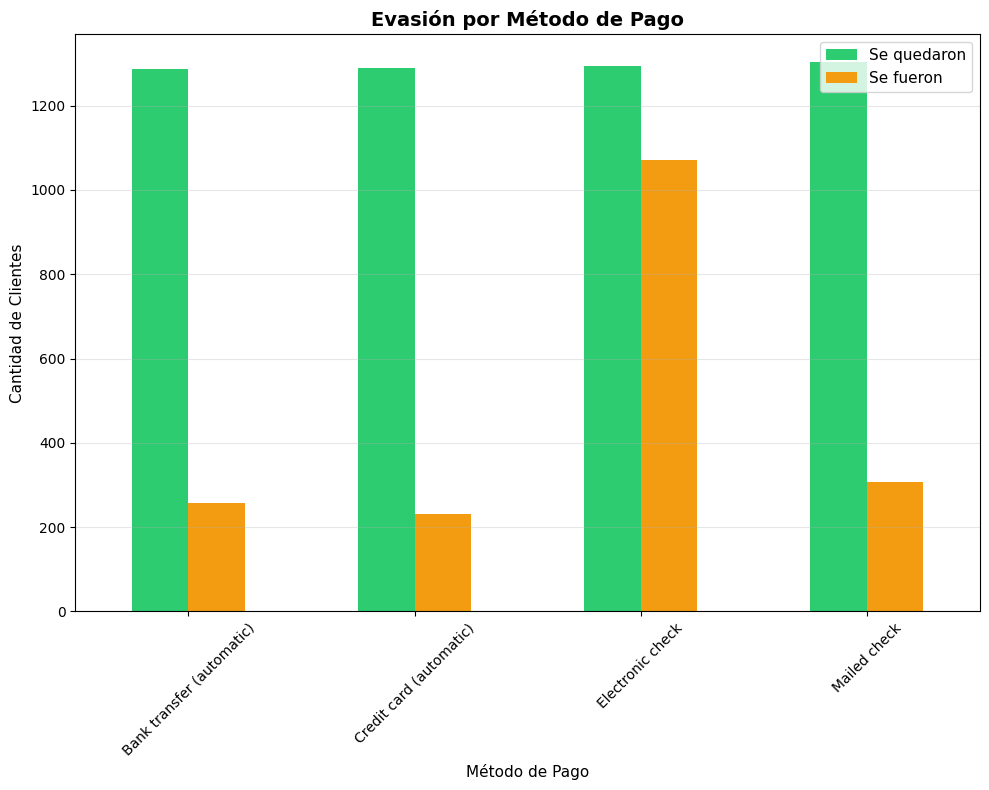

In [65]:
churn_pago = pd.crosstab(datos_normalizados['PaymentMethod'], datos_normalizados['Churn'], normalize='index') * 100
print(churn_pago.round(1))

churn_pago_counts = pd.crosstab(datos_normalizados['PaymentMethod'], datos_normalizados['Churn'])
churn_pago_counts.plot(kind='bar', color=['#2ecc71', '#f39c12'], figsize=(10, 8))
plt.title('Evasión por Método de Pago', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=11)
plt.ylabel('Cantidad de Clientes', fontsize=11)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Churn              No   Yes
InternetService            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4


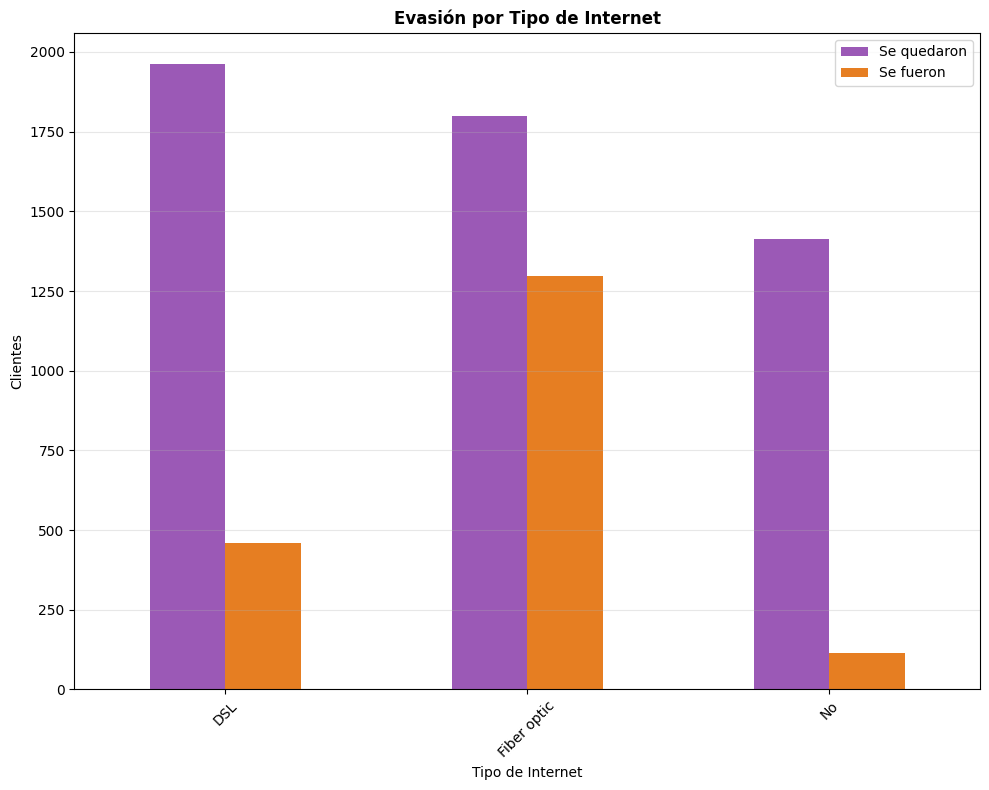

In [66]:
churn_internet = pd.crosstab(datos_normalizados['InternetService'], datos_normalizados['Churn'], normalize='index') * 100
print(churn_internet.round(1))

# Gráfico 4: Tipo de Internet
churn_internet_counts = pd.crosstab(datos_normalizados['InternetService'], datos_normalizados['Churn'])
churn_internet_counts.plot(kind='bar', color=['#9b59b6', '#e67e22'], figsize=(10, 8))
plt.title('Evasión por Tipo de Internet', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Internet', fontsize=10)
plt.ylabel('Clientes', fontsize=10)
plt.xticks(rotation=45)
plt.legend(['Se quedaron', 'Se fueron'], fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#📄Informe final

#Objeto de Analisis

Se buscaba encontrar las razones por las cuales decidian presindir de tu telefonia. D esta froma poder encontrar estrategias o cosas a mejorar para bajar la tasa de cancelaciones.

#Datos

El análisis inicial revela que Telecom X tiene una tasa de evasión del 26.5%:

Se quedaron (No): 5,174 clientes (73.5%)
Se fueron (Yes): 1,869 clientes (26.5%)


Con las graficas presentadas notamos que la evasion no depende de una sola cosa.

La mayor evasion se da en: -Contratos cortos (42.7% en contrato mes a mes)
-Soporte Tecnico (La mayor evasion se dio en los que no contaban con ella)
-Metodo de pago

